# Cluster: PCA UMAP| HDBSCAN

In [11]:
import pandas as pd
import numpy as np
import duckdb as duck
import plotly.express as px

# Create Database, table

In [12]:
conn=duck.connect('country_cluster.db')

In [13]:
## Uncomment this if you are running notebook for first time
# query='Create table country as select * from read_csv_auto("Data/Country-data.xls")'
# conn.execute(query)

In [14]:
conn.sql('show tables')

┌───────────┐
│   name    │
│  varchar  │
├───────────┤
│ country   │
│ desc_data │
└───────────┘

In [15]:
# conn.close()

In [16]:
conn.sql("""select health from country order by health desc""")

┌────────────┐
│   health   │
│   double   │
├────────────┤
│       17.9 │
│       14.2 │
│       13.1 │
│       11.9 │
│       11.9 │
│       11.8 │
│       11.7 │
│       11.6 │
│       11.6 │
│       11.5 │
│         ·  │
│         ·  │
│         ·  │
│       2.84 │
│       2.77 │
│       2.66 │
│       2.63 │
│       2.61 │
│        2.5 │
│       2.46 │
│        2.2 │
│       1.97 │
│       1.81 │
├────────────┤
│  167 rows  │
│ (20 shown) │
└────────────┘

In [17]:
conn.sql('from country')

┌──────────────────────┬────────────┬─────────┬────────┬─────────┬────────┬───────────┬────────────┬───────────┬───────┐
│       country        │ child_mort │ exports │ health │ imports │ income │ inflation │ life_expec │ total_fer │ gdpp  │
│       varchar        │   double   │ double  │ double │ double  │ int64  │  double   │   double   │  double   │ int64 │
├──────────────────────┼────────────┼─────────┼────────┼─────────┼────────┼───────────┼────────────┼───────────┼───────┤
│ Afghanistan          │       90.2 │    10.0 │   7.58 │    44.9 │   1610 │      9.44 │       56.2 │      5.82 │   553 │
│ Albania              │       16.6 │    28.0 │   6.55 │    48.6 │   9930 │      4.49 │       76.3 │      1.65 │  4090 │
│ Algeria              │       27.3 │    38.4 │   4.17 │    31.4 │  12900 │      16.1 │       76.5 │      2.89 │  4460 │
│ Angola               │      119.0 │    62.3 │   2.85 │    42.9 │   5900 │      22.4 │       60.1 │      6.16 │  3530 │
│ Antigua and Barbuda  │       1

In [18]:
# conn.sql('create table desc_data as select * from read_csv_auto("Data/data-dictionary.xls",header=True);')

In [19]:
pd.set_option('display.max_columns',None)
conn.sql('from desc_data')

┌─────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Column Name │                                              Description                                               │
│   varchar   │                                                varchar                                                 │
├─────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ country     │ Name of the country                                                                                    │
│ child_mort  │ Death of children under 5 years of age per 1000 live births                                            │
│ exports     │ Exports of goods and services per capita. Given as %age of the GDP per capita                          │
│ health      │ Total health spending per capita. Given as %age of GDP per capita                                      │
│ imports     │ Imports of goods

In [20]:
conn.sql('''copy (from desc_data) to 'output.csv' (header,delimiter ",")''')

# Problem Statement

Problem Statement :¶

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

# Task :

    To cluster countries based on numerical features.

# Dataset Desciption

    country : Name of the country
    child_mort : Death of children under 5 years of age per 1000 live births
    exports : Exports of goods and services per capita. Given as %age of the GDP per capita
    health : Total health spending per capita. Given as %age of GDP per capita
    imports : Imports of goods and services per capita. Given as %age of the GDP per capita
    Income : Net income per person
    Inflation : The measurement of the annual growth rate of the Total GDP
    life_expec : The average number of years a new born child would live if the current mortality patterns are to rem...
    total_fer : The number of children that would be born to each woman if the current age-fertility rates remain th...
    gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.


# EDA

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=conn.sql('''from country''').df()

## Distribution of columns

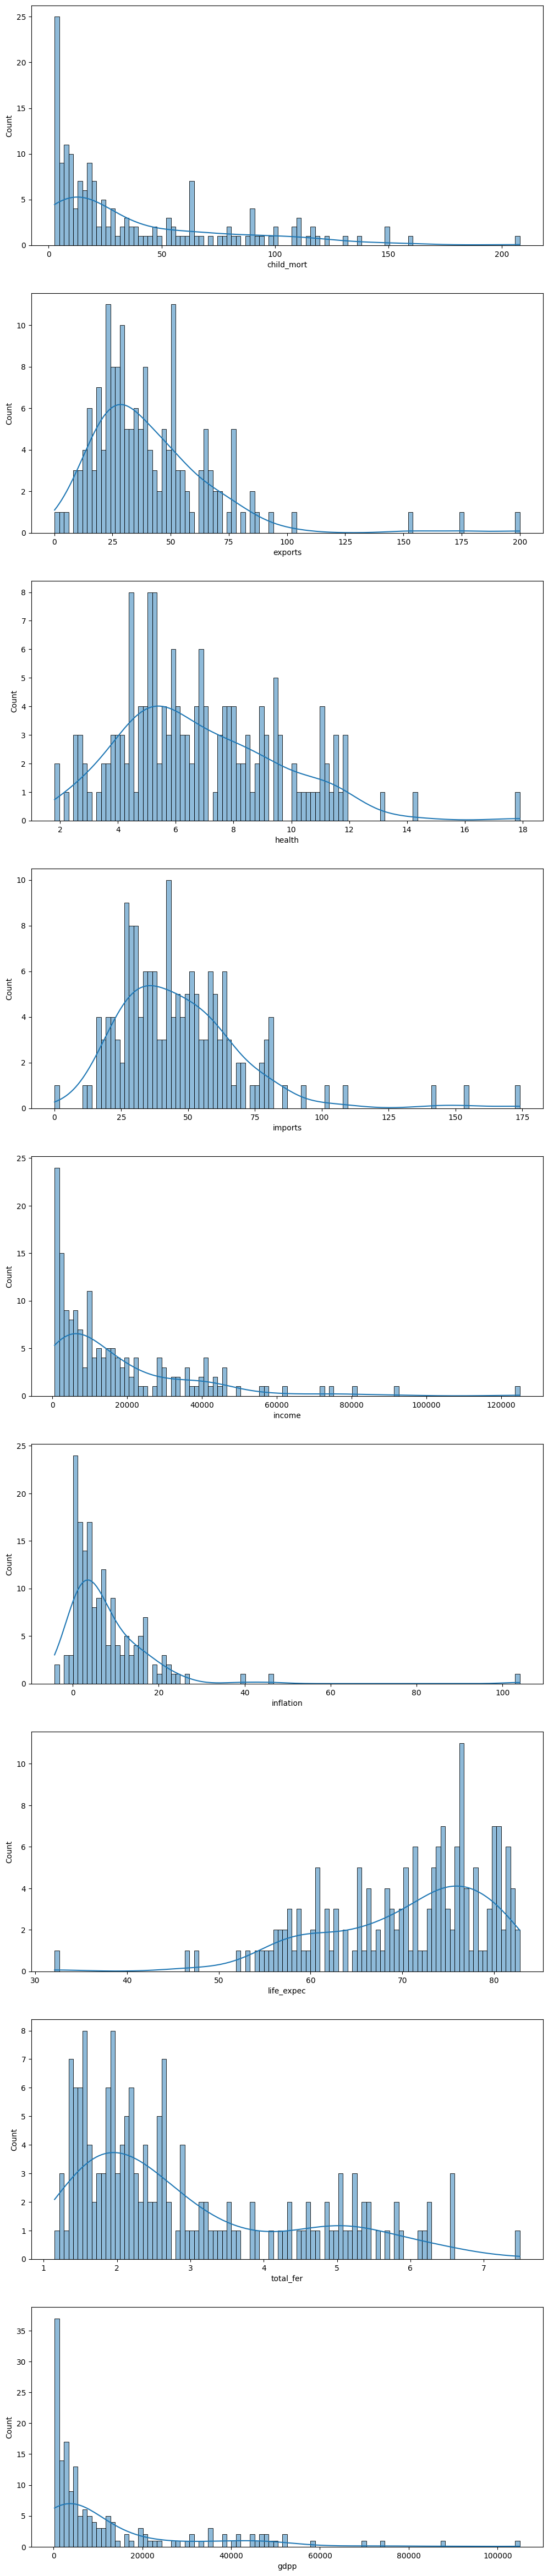

In [23]:
data=conn.sql('select * exclude (country) from country').df()
fig,ax=plt.subplots(data.shape[1],1,figsize=(12,60))
for i in range(data.shape[1]):
    sns.histplot(kde=True,data=data,x=data.columns[i],ax=ax[i],bins=100)

### To check normality

In [24]:
from scipy.stats import probplot
def _probplot(colname):
    probplot(data[colname],plot=plt)
    return plt.show()

#### Export columns

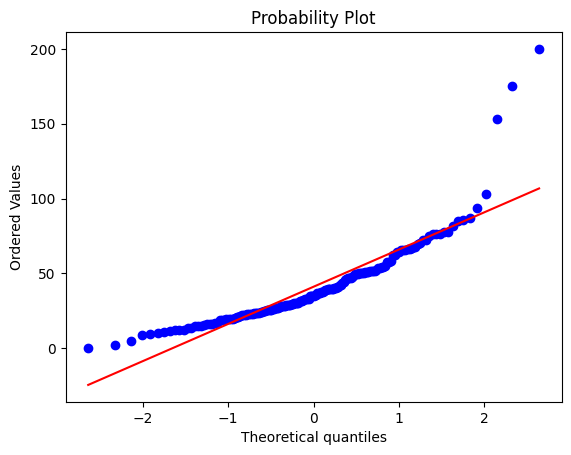

In [25]:
_probplot('exports')

In [26]:
from scipy import stats
stats.skew(data['exports'])

2.423800483638185

#### Health columns

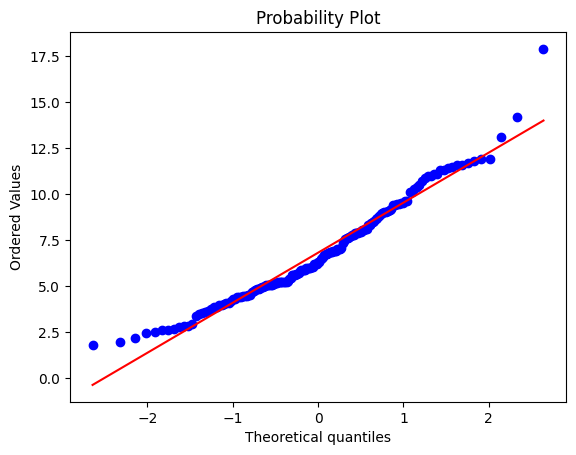

In [27]:
_probplot('health')

In [28]:
stats.skew(data['health'])

0.6993911357163372

#### Imports columns

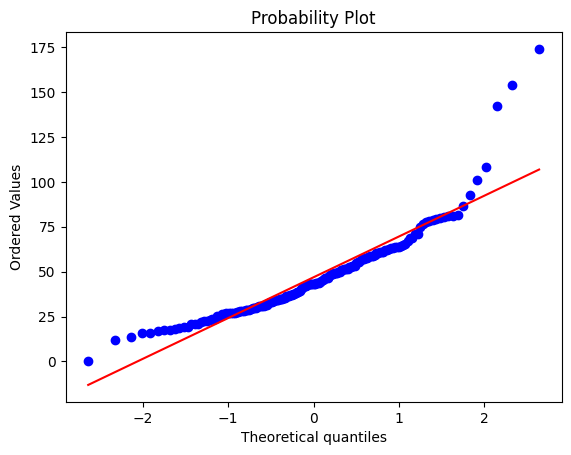

In [29]:
_probplot('imports')

In [30]:
stats.skew(data['imports'])

1.8881195873370953

#### Findings

1. Distribution of Health column is near normal.
2. Life_expec is negativly skewed.
3. All other columns are positively skewed.

## Country Vs Numrical

C:\Users\Linux\AppData\Local\Temp\ipykernel_8416\3897288722.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
C:\Users\Linux\AppData\Local\Temp\ipykernel_8416\3897288722.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
C:\Users\Linux\AppData\Local\Temp\ipykernel_8416\3897288722.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
C:\Users\Linux\AppData\Local\Temp\ipykernel_8416\3897288722.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xtickla

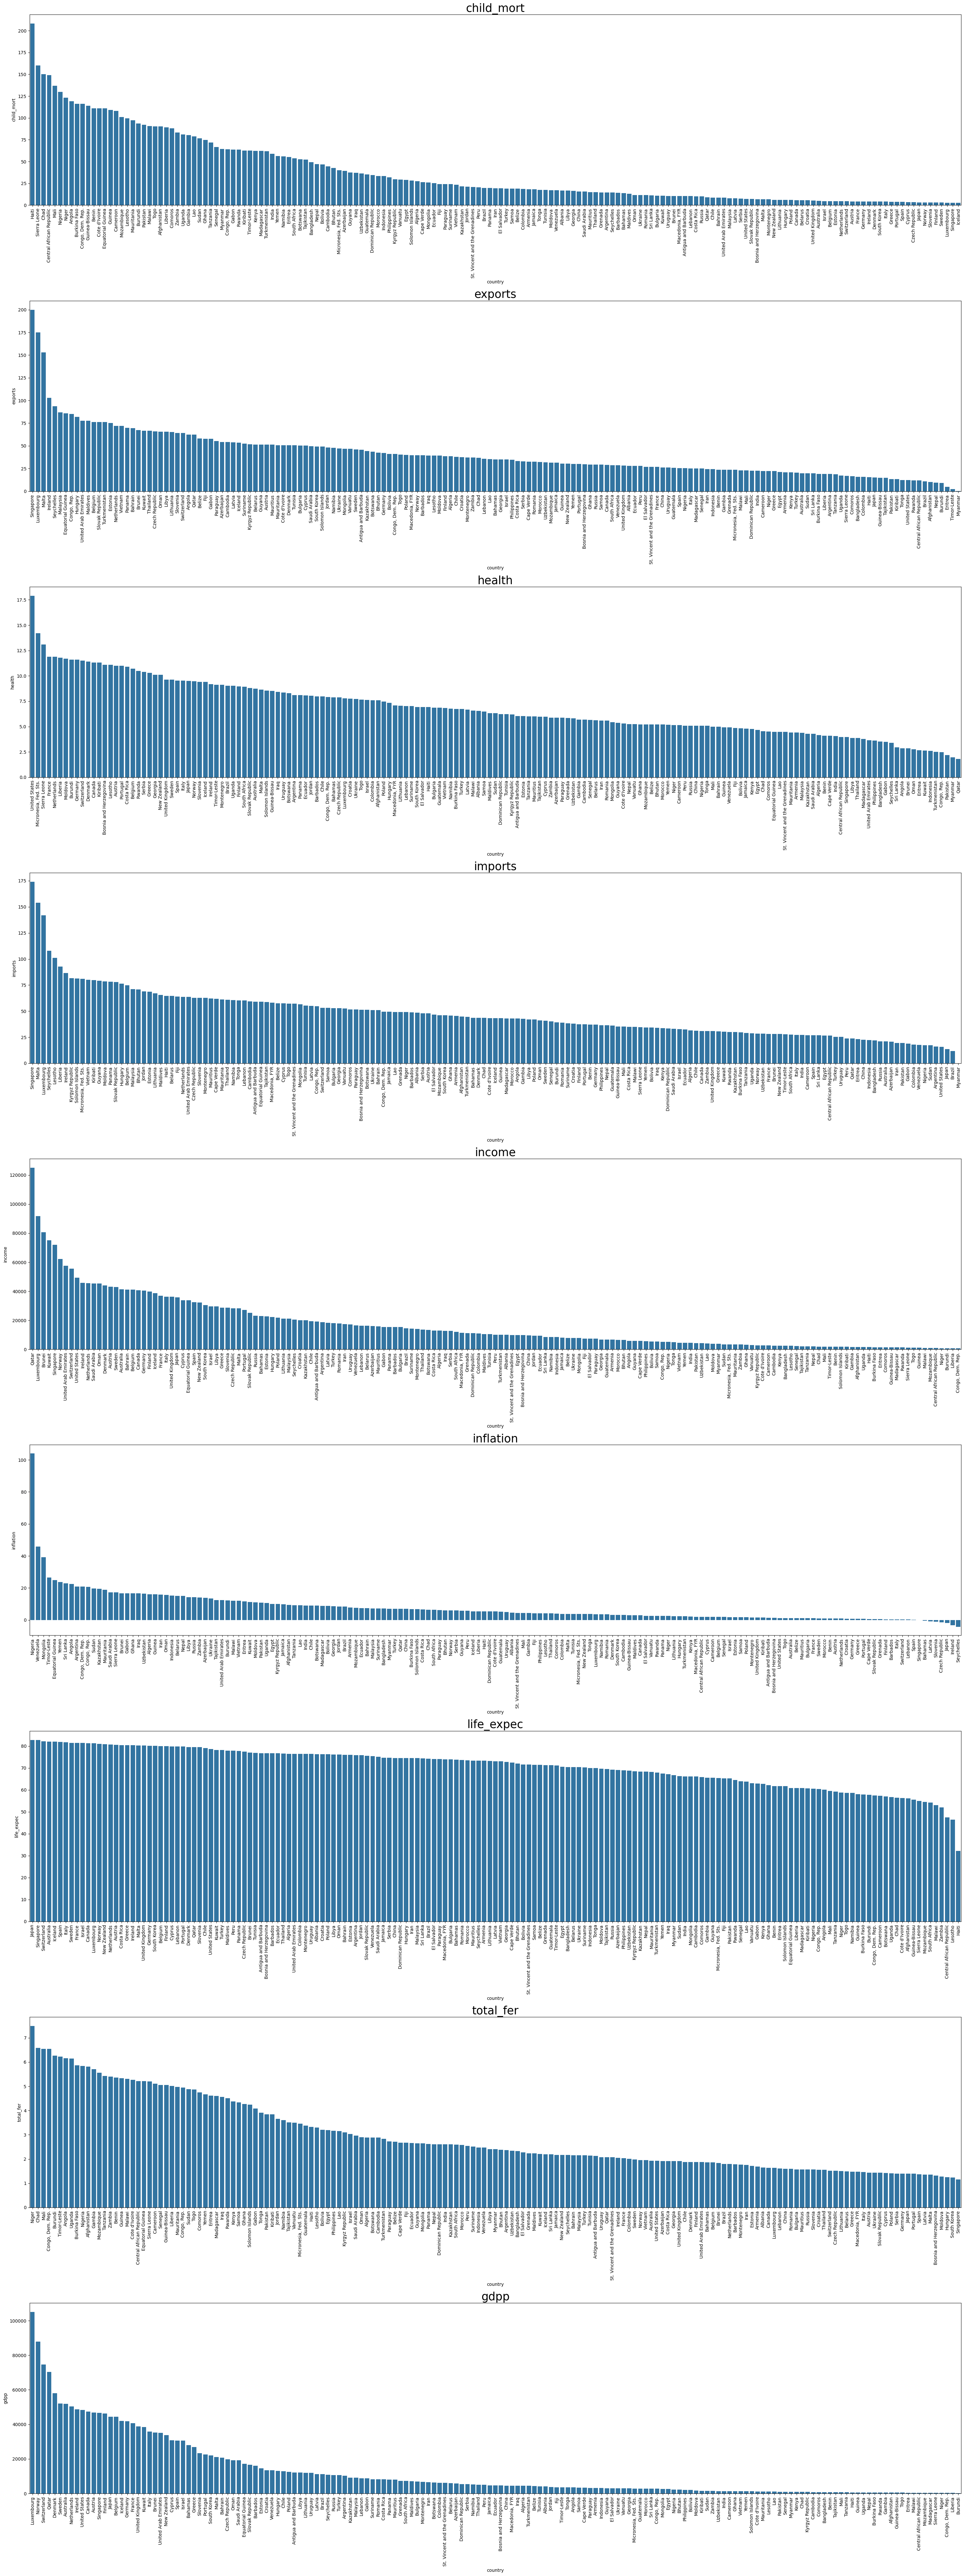

In [31]:
cols=conn.sql('''from country''').df().columns[1:]
fig,ax=plt.subplots(len(cols),1,sharex=False,sharey=False,figsize=(30,80))
for i in range(len(cols)):
    sns.barplot(data=conn.sql(f'from country order by {cols[i]} desc').df(),x='country',y=f'{cols[i]}',ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
    ax[i].set_title(f'{cols[i]}',fontsize=25)
plt.tight_layout()

In [32]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [33]:
px.bar(data_frame=conn.sql(f'from country order by {cols[0]} desc').df(),x='country',y=f'{cols[0]}').data[0]

Bar({
    'alignmentgroup': 'True',
    'hovertemplate': 'country=%{x}<br>child_mort=%{y}<extra></extra>',
    'legendgroup': '',
    'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
    'name': '',
    'offsetgroup': '',
    'orientation': 'v',
    'showlegend': False,
    'textposition': 'auto',
    'x': array(['Haiti', 'Sierra Leone', 'Chad', 'Central African Republic', 'Mali',
                'Nigeria', 'Niger', 'Angola', 'Burkina Faso', 'Congo, Dem. Rep.',
                'Guinea-Bissau', 'Benin', "Cote d'Ivoire", 'Equatorial Guinea',
                'Guinea', 'Cameroon', 'Mozambique', 'Lesotho', 'Mauritania', 'Burundi',
                'Pakistan', 'Malawi', 'Togo', 'Afghanistan', 'Liberia', 'Comoros',
                'Zambia', 'Uganda', 'Gambia', 'Lao', 'Sudan', 'Ghana', 'Tanzania',
                'Senegal', 'Myanmar', 'Congo, Rep.', 'Gabon', 'Rwanda', 'Kiribati',
                'Timor-Leste', 'Kenya', 'Madagascar', 'Turkmenistan', 'India', 'Yemen',
                'Na

In [34]:
cols=conn.sql('''from country''').df().columns[1:]
# fig,ax=plt.subplots(len(cols),1,sharex=False,sharey=False,figsize=(30,80))
fig=make_subplots(rows=len(cols),cols=1)
for i in range(len(cols)):
    fig.add_trace(px.bar(data_frame=conn.sql(f'from country order by {cols[i]} desc').df(),x='country',y=f'{cols[i]}').data[0],row=i+1,col=1)
    # ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
    # ax[i].set_title(f'{cols[i]}',fontsize=25)
# plt.tight_layout()
fig.update_layout(height=4000, width=1000, title_text="Stacked Subplots")
fig.show()

#### Findings

1. Child_mort: African countries have high child mort,while some europian countries along with singapore have low child mort.
2. Export play important role in country income from other countries. Singapore and with four european countries are top 5 amoung largest export and on the other side, some african with myanmar and Nepal are in bottom of export.
3. US with some europian are top of the list of spending money on health, which can also translated to high price of health related stuff. Pakistan,myanmar,Qatar are in lower spending health region which is translated as people in pakistan do less spend on health while in qatar the health care is more affordable.
4. Imports: The top five countries export and import are same, which is possiable if the these nation are covered by sea from most of the side and able to connect other countries to thier goods.Us,Japan,brazil imports minimum which tell more about self relaiance nature of nation
5. Income: Qutar,Kuwait,singapore,luxembourg,brunei are high income countries,while bottom of the list is taken by african nation.
6. Inflation : Nigeria,venezuela,mongolia are top high inflation countries while japan,ireland,seychelles are negative inflation counrties which can do into depression too.
7. Life_expentacy: Japan top the list over 80+ year of life span,and Haiti at the bottom of list with lowest life span of only between 30-40 years
8. Total fertility: Africian countries have high human fertility, while at the bottom singapore,south korea,hungary with lowest fertility.
9. Gdpp: Per person GDP, at top of the list luxembourg,norwat,switerzerland,qatar. lowest gdpp countries are from african continent.

## Correlation

<Axes: >

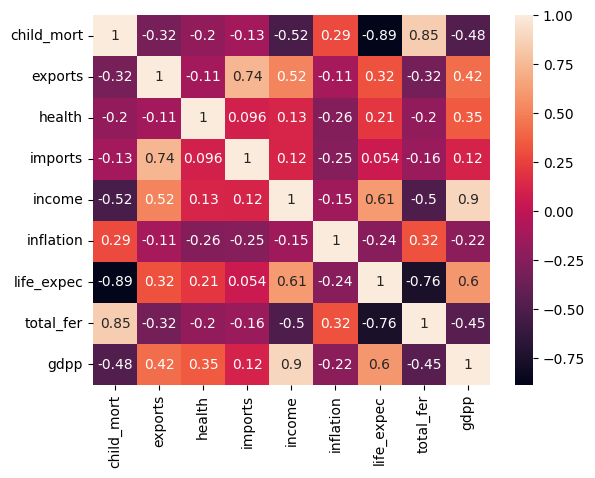

In [35]:
sns.heatmap(data.corr(),annot=True)

#### Findings

High Correlations

1. Child_mort:

`Positively correlated to Total_fer
More number of child born lead to more child mort`

`Negatively correlated to life_expec
Good food and envornment lead to high life_expec, which leads to negative child_mort`

2. Exports:

`Positvely correlated to imports and income`
As the country size increase the export and imports increases too.
As export of the country increases the income of the individual increases

3. Health,imports do not have any strong correlations
4. Income:
`positively correlated to gdp per person`
5. Life expec:
`Negatively correlated to total_fer`

# Data Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data_mm=pd.DataFrame(mm.fit_transform(data),columns=data.columns)

# Feature Engineering

PCA

In [37]:
from sklearn.decomposition import PCA
pca=PCA()
data_mm_pca=pca.fit_transform(data_mm)

In [38]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

In [39]:
pd.DataFrame(data_mm_pca)

,0,1,2,3,4,5,6,7,8
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646,0.115254,-0.003232,-0.065701
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515,0.005521,0.056038,-0.036459
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237,-0.039743,-0.006124,-0.017780
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254,0.012519,0.014231,-0.011441


In [40]:
data_mm_pca_pd=pd.DataFrame(data_mm_pca).iloc[:,:3]

UMAP

In [41]:
from umap.umap_ import UMAP
_umap=UMAP(n_components=3)
_umap.fit_transform(data_mm)


array([[11.43262   ,  4.2769012 ,  3.1144872 ],
       [ 4.8790593 ,  7.0944414 ,  4.527413  ],
       [ 6.5101366 ,  7.2713246 ,  3.7951033 ],
       [11.292952  ,  4.0389733 ,  3.945051  ],
       [ 4.234276  ,  6.73093   ,  4.5094833 ],
       [ 5.376636  ,  7.935264  ,  3.9944317 ],
       [ 5.7959037 ,  6.9618616 ,  4.428345  ],
       [ 0.29102904,  6.698663  ,  4.6324005 ],
       [ 0.49959004,  6.401756  ,  4.3689775 ],
       [ 6.607073  ,  7.217516  ,  4.0414557 ],
       [ 3.90009   ,  7.6115913 ,  4.190956  ],
       [ 2.8808978 ,  6.252417  ,  4.1989903 ],
       [ 7.1418695 ,  7.0369596 ,  3.515967  ],
       [ 4.2131    ,  7.523402  ,  4.397054  ],
       [ 4.1526604 ,  6.7548814 ,  4.9443393 ],
       [ 1.0128717 ,  6.3669677 ,  4.649962  ],
       [ 6.1227846 ,  5.898883  ,  4.1657033 ],
       [11.133874  ,  4.251137  ,  3.750187  ],
       [ 6.447594  ,  5.8051505 ,  4.295623  ],
       [ 6.9497337 ,  6.465792  ,  3.7793574 ],
       [ 4.3637486 ,  8.0462055 ,  4.743

In [42]:
df_mm_umap=pd.DataFrame(_umap.embedding_)

In [43]:
px.scatter_3d(
    x=df_mm_umap[0],
    y=df_mm_umap[1],
    z=df_mm_umap[2],
)

# Modeling

## HDBSCAN

### With PCA Data

In [44]:
from hdbscan import HDBSCAN
from hdbscan.validity import validity_index
hdb=HDBSCAN(gen_min_span_tree=True)
hdb.fit(data_mm_pca_pd)

HDBSCAN(gen_min_span_tree=True)

In [45]:
validity_index(data_mm_pca,hdb.labels_)

0.05695872305808614

In [46]:
fig=px.scatter_3d(
    x=data_mm_pca_pd[0],
    y=data_mm_pca_pd[1],
    z=data_mm_pca_pd[2],
    color=hdb.labels_
)
fig.show()

### HDBSCAN Hyperparmater

In [47]:
import hdbscan

def dbcv_score(estimator,X):
    estimator.fit(X)
    labels=estimator.labels_
    return validity_index(X,labels)

In [48]:
from sklearn.model_selection import GridSearchCV
params={'min_cluster_size':range(3,5),'min_samples':range(1,20),'max_cluster_size':range(2,5)}
temp=HDBSCAN()
gscv_hdb=GridSearchCV(estimator=temp,param_grid=params,scoring=dbcv_score)
# gscv_hdb.fit(data_mm_pca)

In [49]:
# validity_index(data_mm_pca,gscv_hdb.best_estimator_.labels_)

In [50]:
# px.scatter_3d(
#     x=data_mm_pca_pd[0],
#     y=data_mm_pca_pd[1],
#     z=data_mm_pca_pd[2],
#     color=gscv_hdb.best_estimator_.labels_
# )

### With Umap Data

In [51]:
_umap.fit_transform(data)
data_umap=pd.DataFrame(_umap.embedding_).fillna(0)

In [52]:
gscv_hdb.fit(data_umap)

c:\Users\Linux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Linux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Linux\AppData\Local\Temp\ipykernel_8416\3334293759.py", line 6, in dbcv_score
    return validity_index(X,labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Linux\AppData\Local\Programs\Python\Python311\Lib\site-packages\hdbscan\validity.py", line 359, in validity_index
    cluster_id] = distances_between_points(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Linux\AppData\Local\Programs\Python\Python311\Lib\site-packages\hdbscan\validity.py", line 116, in distan

GridSearchCV(estimator=HDBSCAN(),
             param_grid={'max_cluster_size': range(2, 5),
                         'min_cluster_size': range(3, 5),
                         'min_samples': range(1, 20)},
             scoring=<function dbcv_score at 0x0000023E605C7920>)

In [53]:
conn.close()

In [54]:
gscv_hdb.best_params_

{'max_cluster_size': 2, 'min_cluster_size': 3, 'min_samples': 1}

In [55]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [56]:
# print(validity_index(df_mm_umap,gscv_hdb.best_estimator_.labels_))
px.scatter_3d(
    x=df_mm_umap[0],
    y=df_mm_umap[1],
    z=df_mm_umap[2],
    color=gscv_hdb.best_estimator_.labels_
)

In [57]:
gscv_hdb.best_params_

{'max_cluster_size': 2, 'min_cluster_size': 3, 'min_samples': 1}

In [58]:
gscv_hdb.best_estimator_.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [59]:
data_mm['labels']=gscv_hdb.best_estimator_.labels_

# Result

The countries which require help has following description of features:
1. High child_mort
2. low income
3. low gdpp
4. low life_expec

Checking: Which group has following property?

In [60]:
data_mm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,-1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,-1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,-1
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,-1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,-1


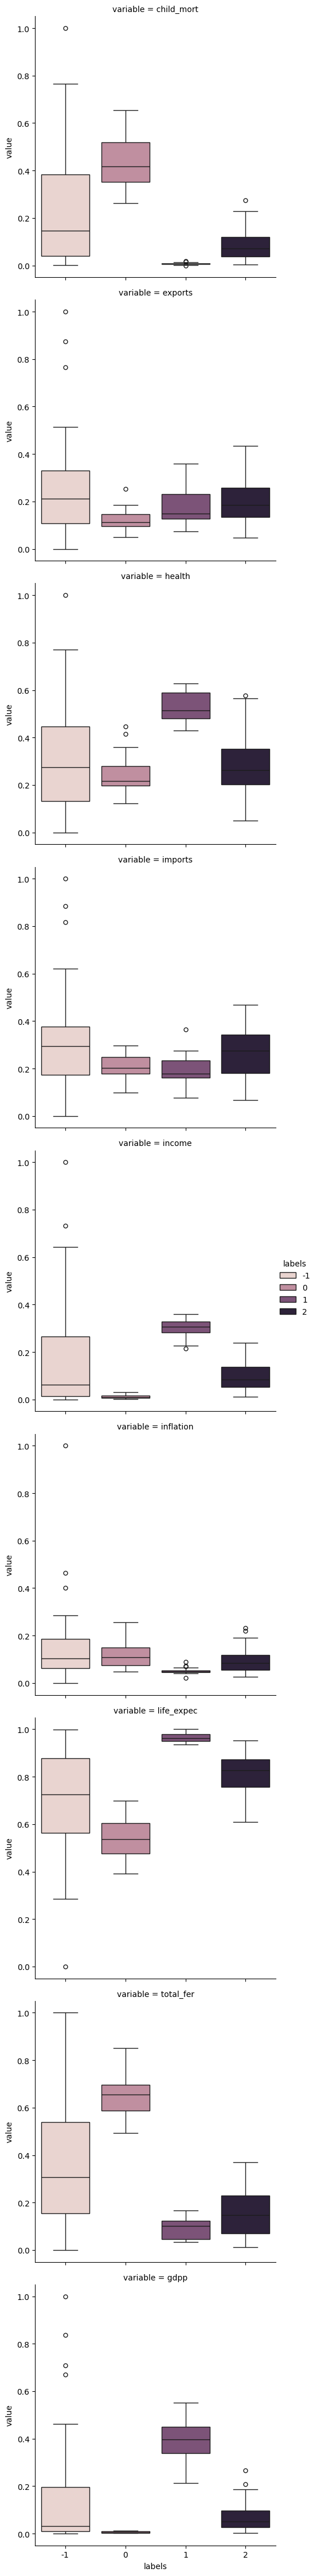

In [70]:
sns.catplot(kind='box',data=data_mm.melt(id_vars=['labels']),x='labels',row='variable',y='value',hue='labels')

Countries in Group 0 have property which require HELP NGO's help.

In [71]:
df['labels']=gscv_hdb.best_estimator_.labels_
df.loc[(df['labels']==0),'Class']='Help Needed'
df.loc[(df['labels']==1),'Class']='May Need help'
df.loc[(df['labels']==2),'Class']='Do not need help'
df.loc[(df['labels']==-1),'Class']='Outlier'

In [72]:
px.choropleth(data_frame=df[['country','Class']],
              locationmode='country names',
              locations='country',
              title='Needed Help per Country (World)',
              color='Class',
              color_discrete_map={
                  'Outlier':'Black',
                  'Help Needed':'Red',
                  'May Need help':'Yellow',
                  'Do not need help':'Green'}
              
              )

# Conclusion

1. From domain knowlegde some countries are correctly categorized. But country like USA, should be a part of "Do not need help" group, which is possiable when it is outlier in its group only.
The model performance is not great. 